# Gokul Raja R
Data Science and Business Analytics Intern
The Sparks Foundation

# Superstore Project---Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.express as px
cf.go_offline()

In [2]:
d = pd.read_csv("SampleSuperstore.csv")

In [3]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis
Checking the value in the columns

In [4]:
#checking the type of data available in columns
d['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [5]:
d['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
d['Country'].unique()

array(['United States'], dtype=object)

In [7]:
d['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [8]:
d['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
d['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
d['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
#to check is there any null values
d.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
#its returns all details about coloumn
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

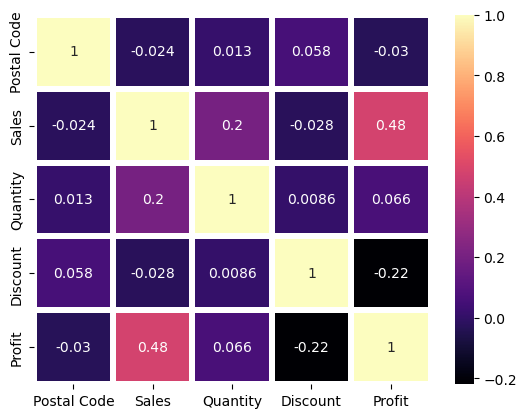

In [13]:
#heat map is used to see the corlation between the data
sns.heatmap(d.corr(), annot=True, cmap = "magma", linecolor = "white", linewidth = "3")

In [14]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [15]:
x = d['Profit'].sum()
print("{} Dollers".format(int(x)))

286397 Dollers


# Break the Dataset into two problems to easyly understand
This may increase the understanding of problems better.
we going to work on the losses in profit.
so Split the data by loss in #Profit.

In [16]:
loss = d[d['Profit']<0]
profit = d[d['Profit']>0]

In [17]:
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [18]:
o = profit['Profit'].mean()
y = profit['Profit'].sum()
z =  profit['Discount'].mean()
print("The average profit in profit dataset is {} and total profit is {}".format(o,y))
print("The average discount is {}".format(z*100))

The average profit in profit dataset is 54.917883767684025 and total profit is 442528.3074
The average discount is 8.104368329610462


Average profit is 54.91 dollers per order on profit data

In [19]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [20]:
o = loss['Profit'].mean()
y = loss['Profit'].sum()
z =  loss['Discount'].mean()
print("The average profit in loss dataset is {} and total profit is {}".format(o,y))
print("The average discount is {}".format(z*100))

The average profit in loss dataset is -83.44804152859435 and total profit is -156131.2857
The average discount is 48.0887226082312


Average profit is -83.44 dollers per order on loss data and overall loss is -156131.28

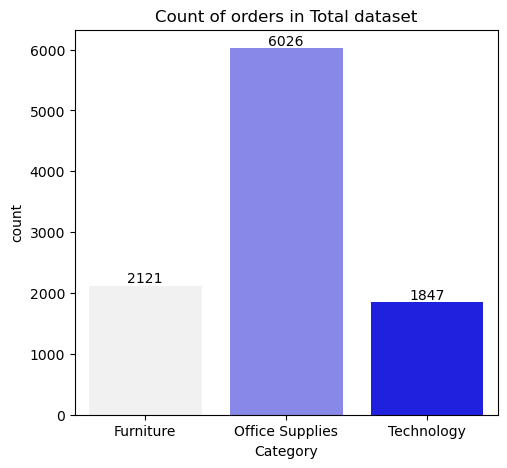

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("Count of orders in Total dataset")
x = sns.countplot(data = d, x = 'Category',palette = "light:b")
for i in x.containers:
    x.bar_label(i,)

# Lets see count of order as per region in loss data

[Text(0, 0, '259'), Text(0, 0, '741'), Text(0, 0, '553'), Text(0, 0, '318')]

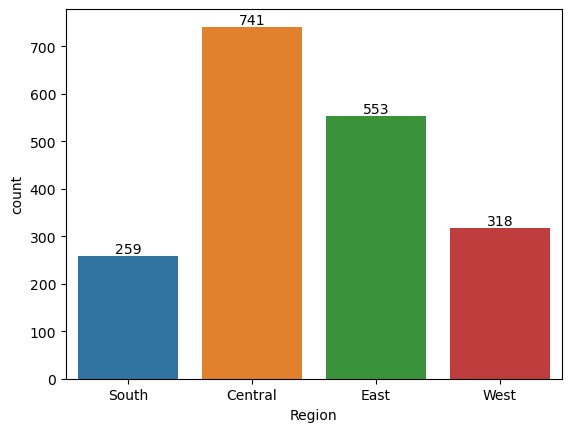

In [44]:
x = sns.countplot(data = loss, x = 'Region')
x.bar_label(x.containers[0])

# Lets check total loss and average loss by Region 

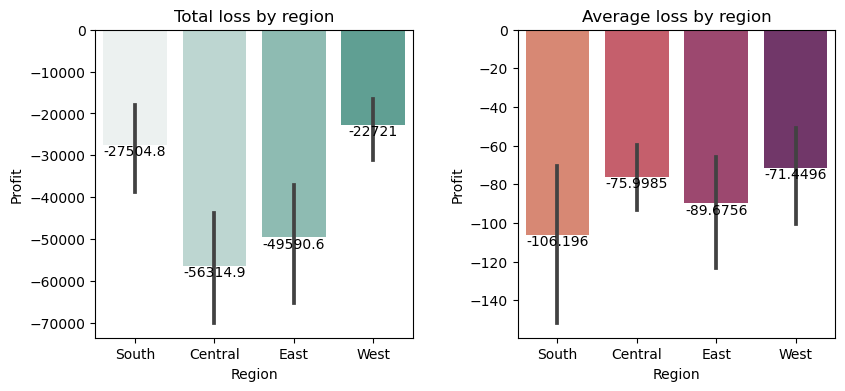

In [23]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.33) 
plt.subplot(1,3,1)
plt.title('Total loss by region')
x = sns.barplot(data = loss, x= 'Region',y='Profit',estimator=np.sum,palette = "light:#5A9")
for i in x.containers:
    x.bar_label(i,)
plt.subplot(1,3,2)
plt.title('Average loss by region')
y = sns.barplot(data = loss, x= 'Region',y='Profit', palette = "flare")
for i in y.containers:
    y.bar_label(i,)

The region with the highest loss profit is hear Central.

# Comparing the pattern of loss and profit datas

Text(0.5, 1.0, 'loss by region and category')

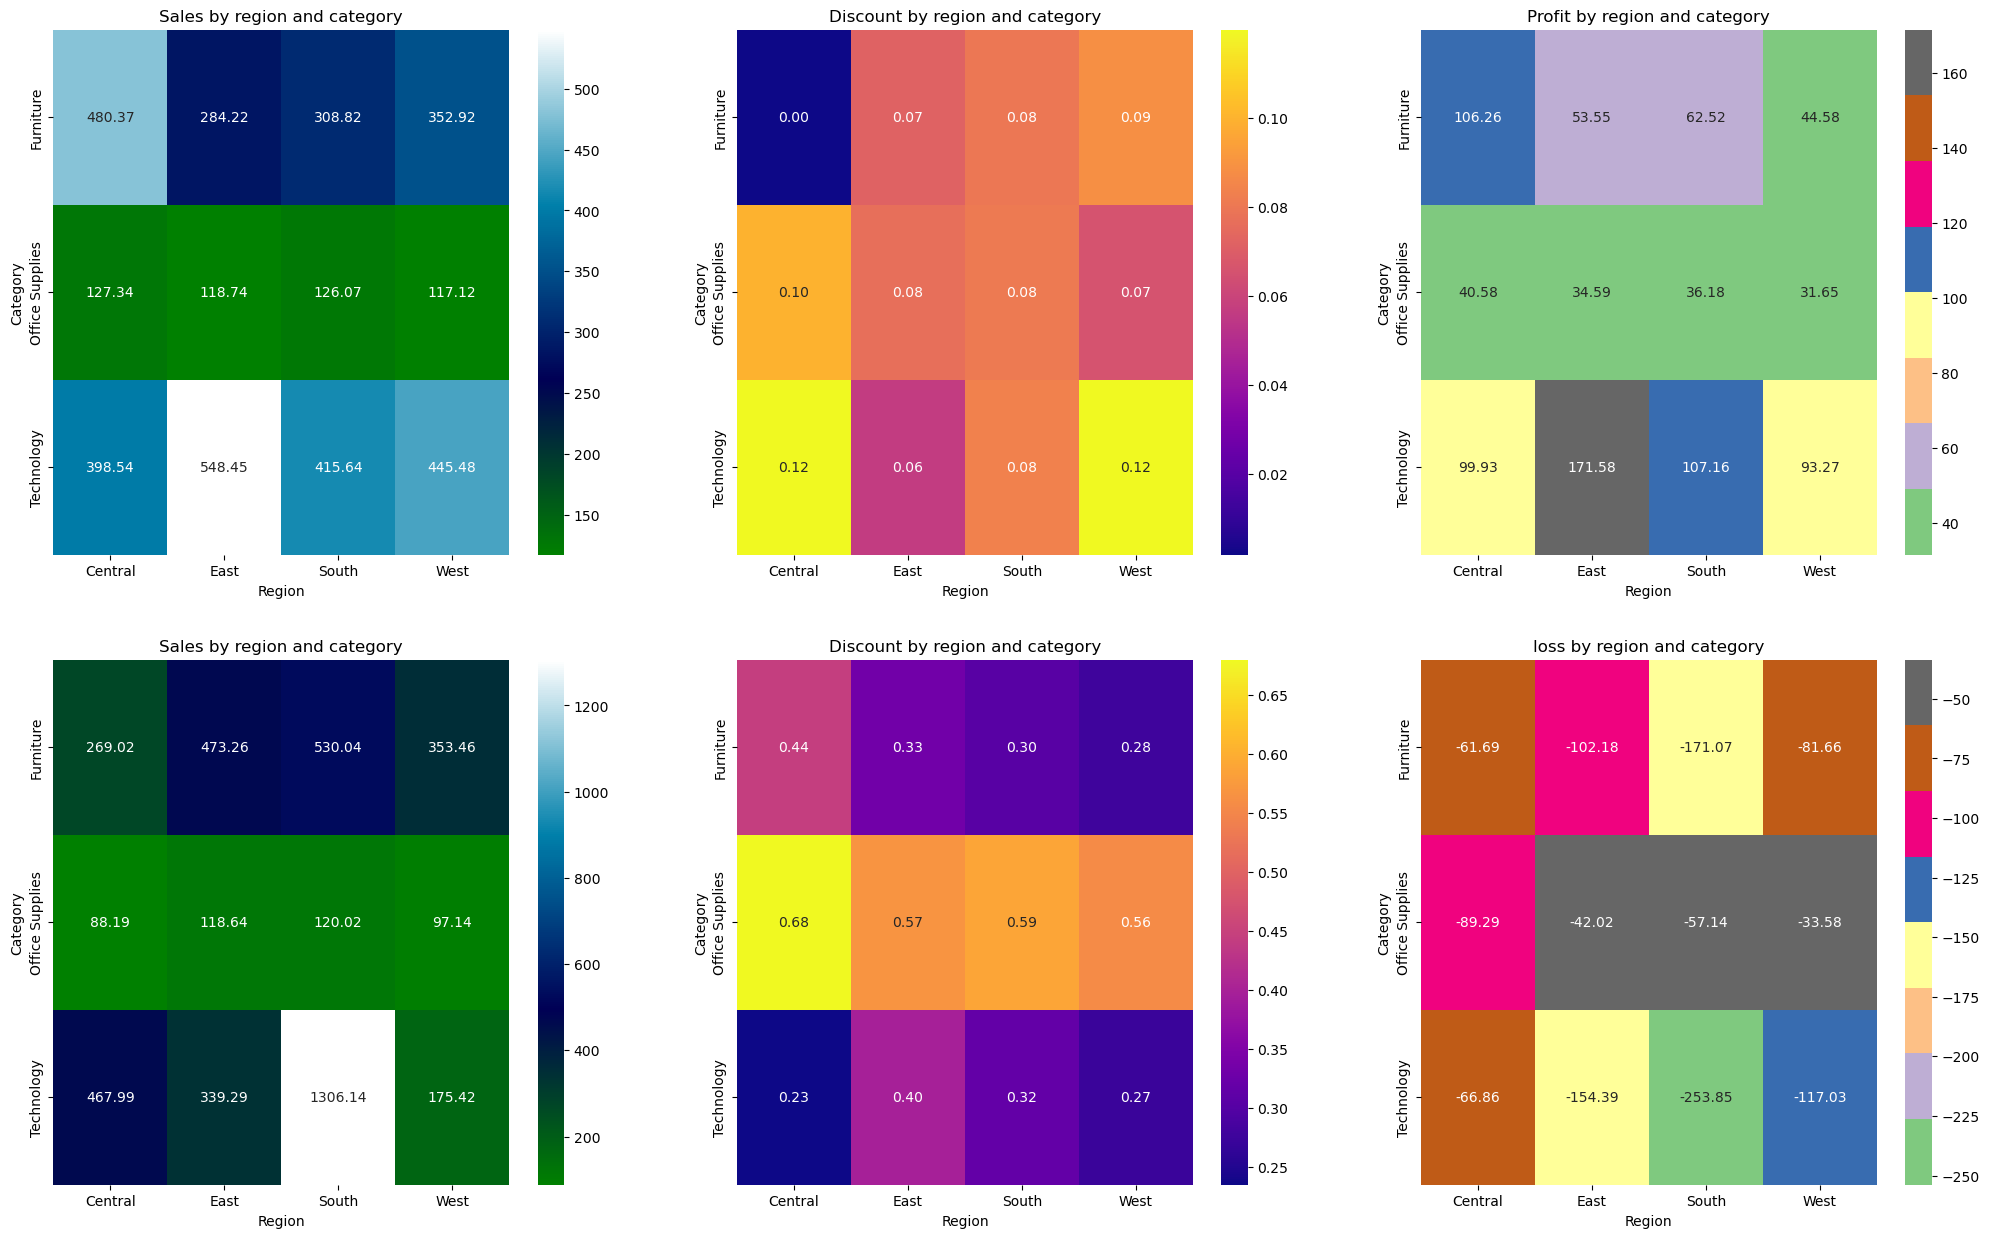

In [24]:
fig, axes = plt.subplots(2,3,figsize=(25, 15))

datapivot = profit.pivot_table(values='Sales',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True,fmt = ".2f", cmap = "ocean",ax=axes[0,0])
axes[0,0].set_title("Sales by region and category")

datapivot = profit.pivot_table(values='Discount',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "plasma",ax=axes[0,1])
axes[0,1].set_title("Discount by region and category")

datapivot = profit.pivot_table(values='Profit',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "Accent",ax=axes[0,2])
axes[0,2].set_title("Profit by region and category")

datapivot = loss.pivot_table(values='Sales',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True,fmt = ".2f", cmap = "ocean",ax=axes[1,0])
axes[1,0].set_title("Sales by region and category")

datapivot = loss.pivot_table(values='Discount',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "plasma",ax=axes[1,1])
axes[1,1].set_title("Discount by region and category")

datapivot = loss.pivot_table(values='Profit',index='Category',columns='Region')
sns.heatmap(datapivot, annot = True, fmt = ".2f", cmap = "Accent",ax=axes[1,2])
axes[1,2].set_title("loss by region and category")

# The data was grouby the Region and sales, profit, discount

In [25]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Region"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
               Sales      Profit  Discount
Region                                    
Central  141282.6588 -56314.8850  0.549447
East     160864.0120 -49590.6075  0.446835
South     91635.1850 -27504.8323  0.491699
West      74925.2990 -22720.9609  0.371541
---------------------grouped profit data-------------------------
               Sales       Profit  Discount
Region                                     
Central  355822.9170   96021.2475  0.094780
East     509215.9260  141113.3875  0.072276
South    294021.3920   74254.2626  0.081454
West     641746.6235  131139.4098  0.080283
---------------------grouped all data-------------------------
               Sales       Profit  Discount
Region                                     
Central  501239.8908   39706.3625  0.240353
East     678781.2400   91522.7800  0.145365
South    391721.9050   46749.4303  0.147253
West     725457.8245  108418.4489  0.109335


the data groupen by category

In [26]:
print("---------------------grouped loss data-------------------------")
grouped_data_for_loss = loss.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_loss)
print("---------------------grouped profit data-------------------------")
grouped_data_for_profit = profit.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_profit)
print("---------------------grouped all data-------------------------")
grouped_data_for_data = d.groupby(["Category"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(grouped_data_for_data)

---------------------grouped loss data-------------------------
                       Sales      Profit  Discount
Category                                          
Furniture        257885.5868 -60936.1090  0.367143
Office Supplies   91608.6750 -56615.2585  0.617607
Technology       119212.8930 -38579.9182  0.333579
---------------------grouped profit data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        465116.9615   79387.3818  0.071943
Office Supplies  618988.7490  179106.0593  0.078341
Technology       716701.1480  184034.8663  0.097775
---------------------grouped all data-------------------------
                       Sales       Profit  Discount
Category                                           
Furniture        741999.7953   18451.2728  0.173923
Office Supplies  719047.0320  122490.8008  0.157285
Technology       836154.0330  145454.9481  0.132323


Loss data groupby region and cities

In [27]:
gdsloss = loss.groupby(["Region","State"]).agg({'Sales': 'sum', 'Profit': 'sum','Discount': 'mean'})
print(gdsloss)

                              Sales      Profit  Discount
Region  State                                            
Central Illinois         38626.2020 -19501.6975  0.564314
        Texas           102656.4568 -36813.1875  0.541646
East    Connecticut        252.3570    -19.6146  0.300000
        Delaware           510.2790    -85.8963  0.300000
        Maryland           789.8030    -71.1170  0.300000
        Massachusetts     3275.3210   -566.2617  0.300000
        New Hampshire     1053.1640   -105.3164  0.300000
        New Jersey         418.2920    -51.2906  0.300000
        New York         26533.3500  -5031.1378  0.310638
        Ohio             49807.6240 -21750.0002  0.472249
        Pennsylvania     75792.2320 -21602.8515  0.460791
        Rhode Island      1758.2460   -230.1678  0.300000
        West Virginia      673.3440    -76.9536  0.300000
South   Florida          45694.1320  -8689.8295  0.501984
        North Carolina   28226.5400 -11557.9854  0.505882
        Tennes

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

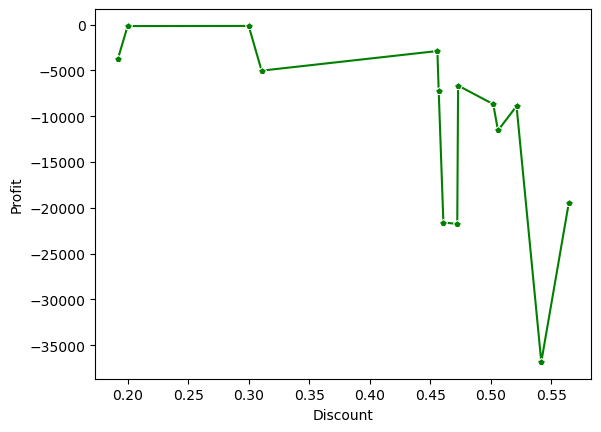

In [28]:
sns.lineplot(data = gdsloss, x = "Discount", y = 'Profit', color= "g",marker = "p", ci = None)

<AxesSubplot:xlabel='State', ylabel='Profit'>

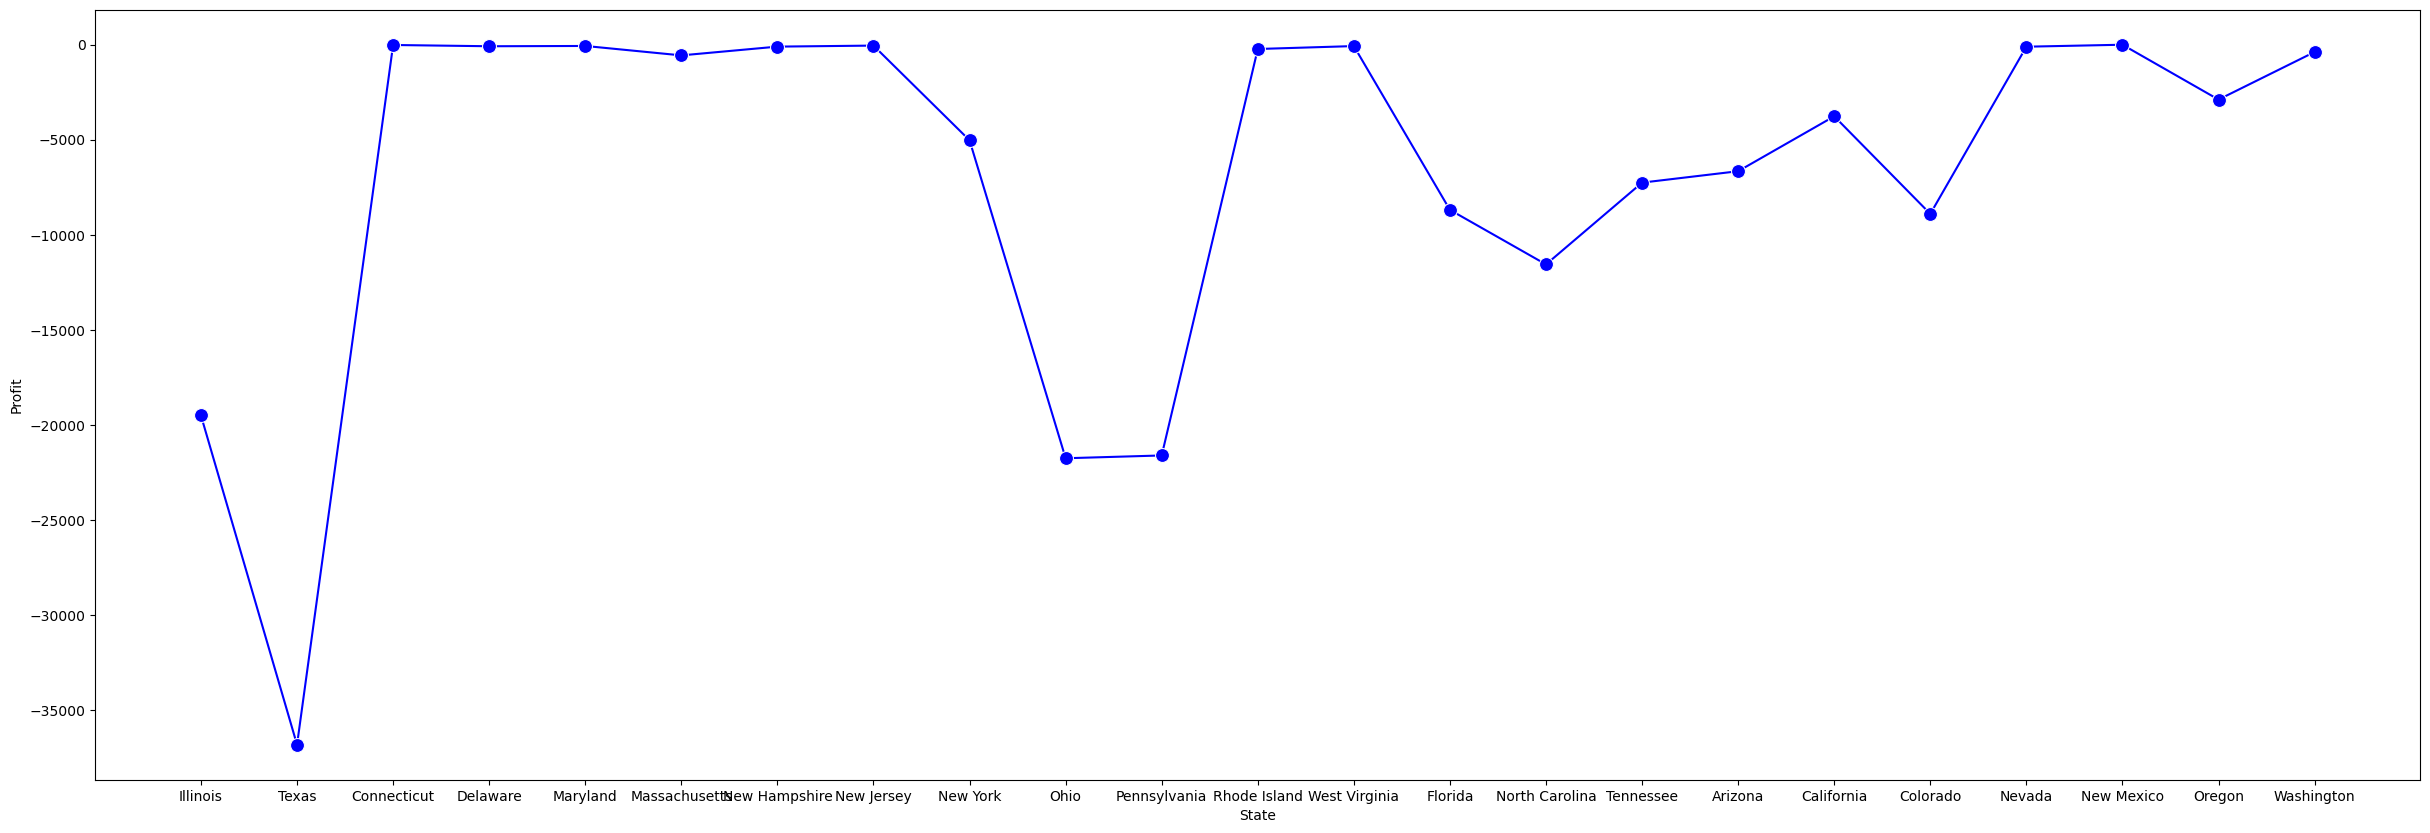

In [29]:
plt.figure(figsize=(30, 10))
sns.lineplot(data = gdsloss, x = "State", y = "Profit", marker= ".", dashes=True,color="b", ms = 20)

# Comparing the discount of loss and profit data

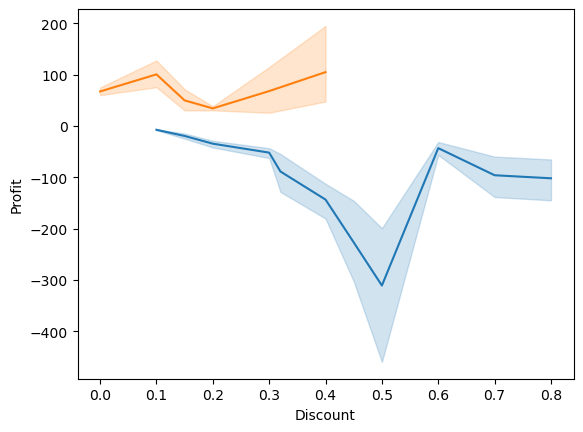

In [30]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='Discount', y='Profit', data=loss, legend = True)
ax= sns.lineplot(x='Discount', y='Profit', data=profit,legend = True)


Here we seen that the profit data set discount value are crossing the above 40% discount.

# Comparing data's

All data------------profit data-----------loss data  <br>        
Row 1 : Profit with ship mode 
Row 1 : Loss with ship mode


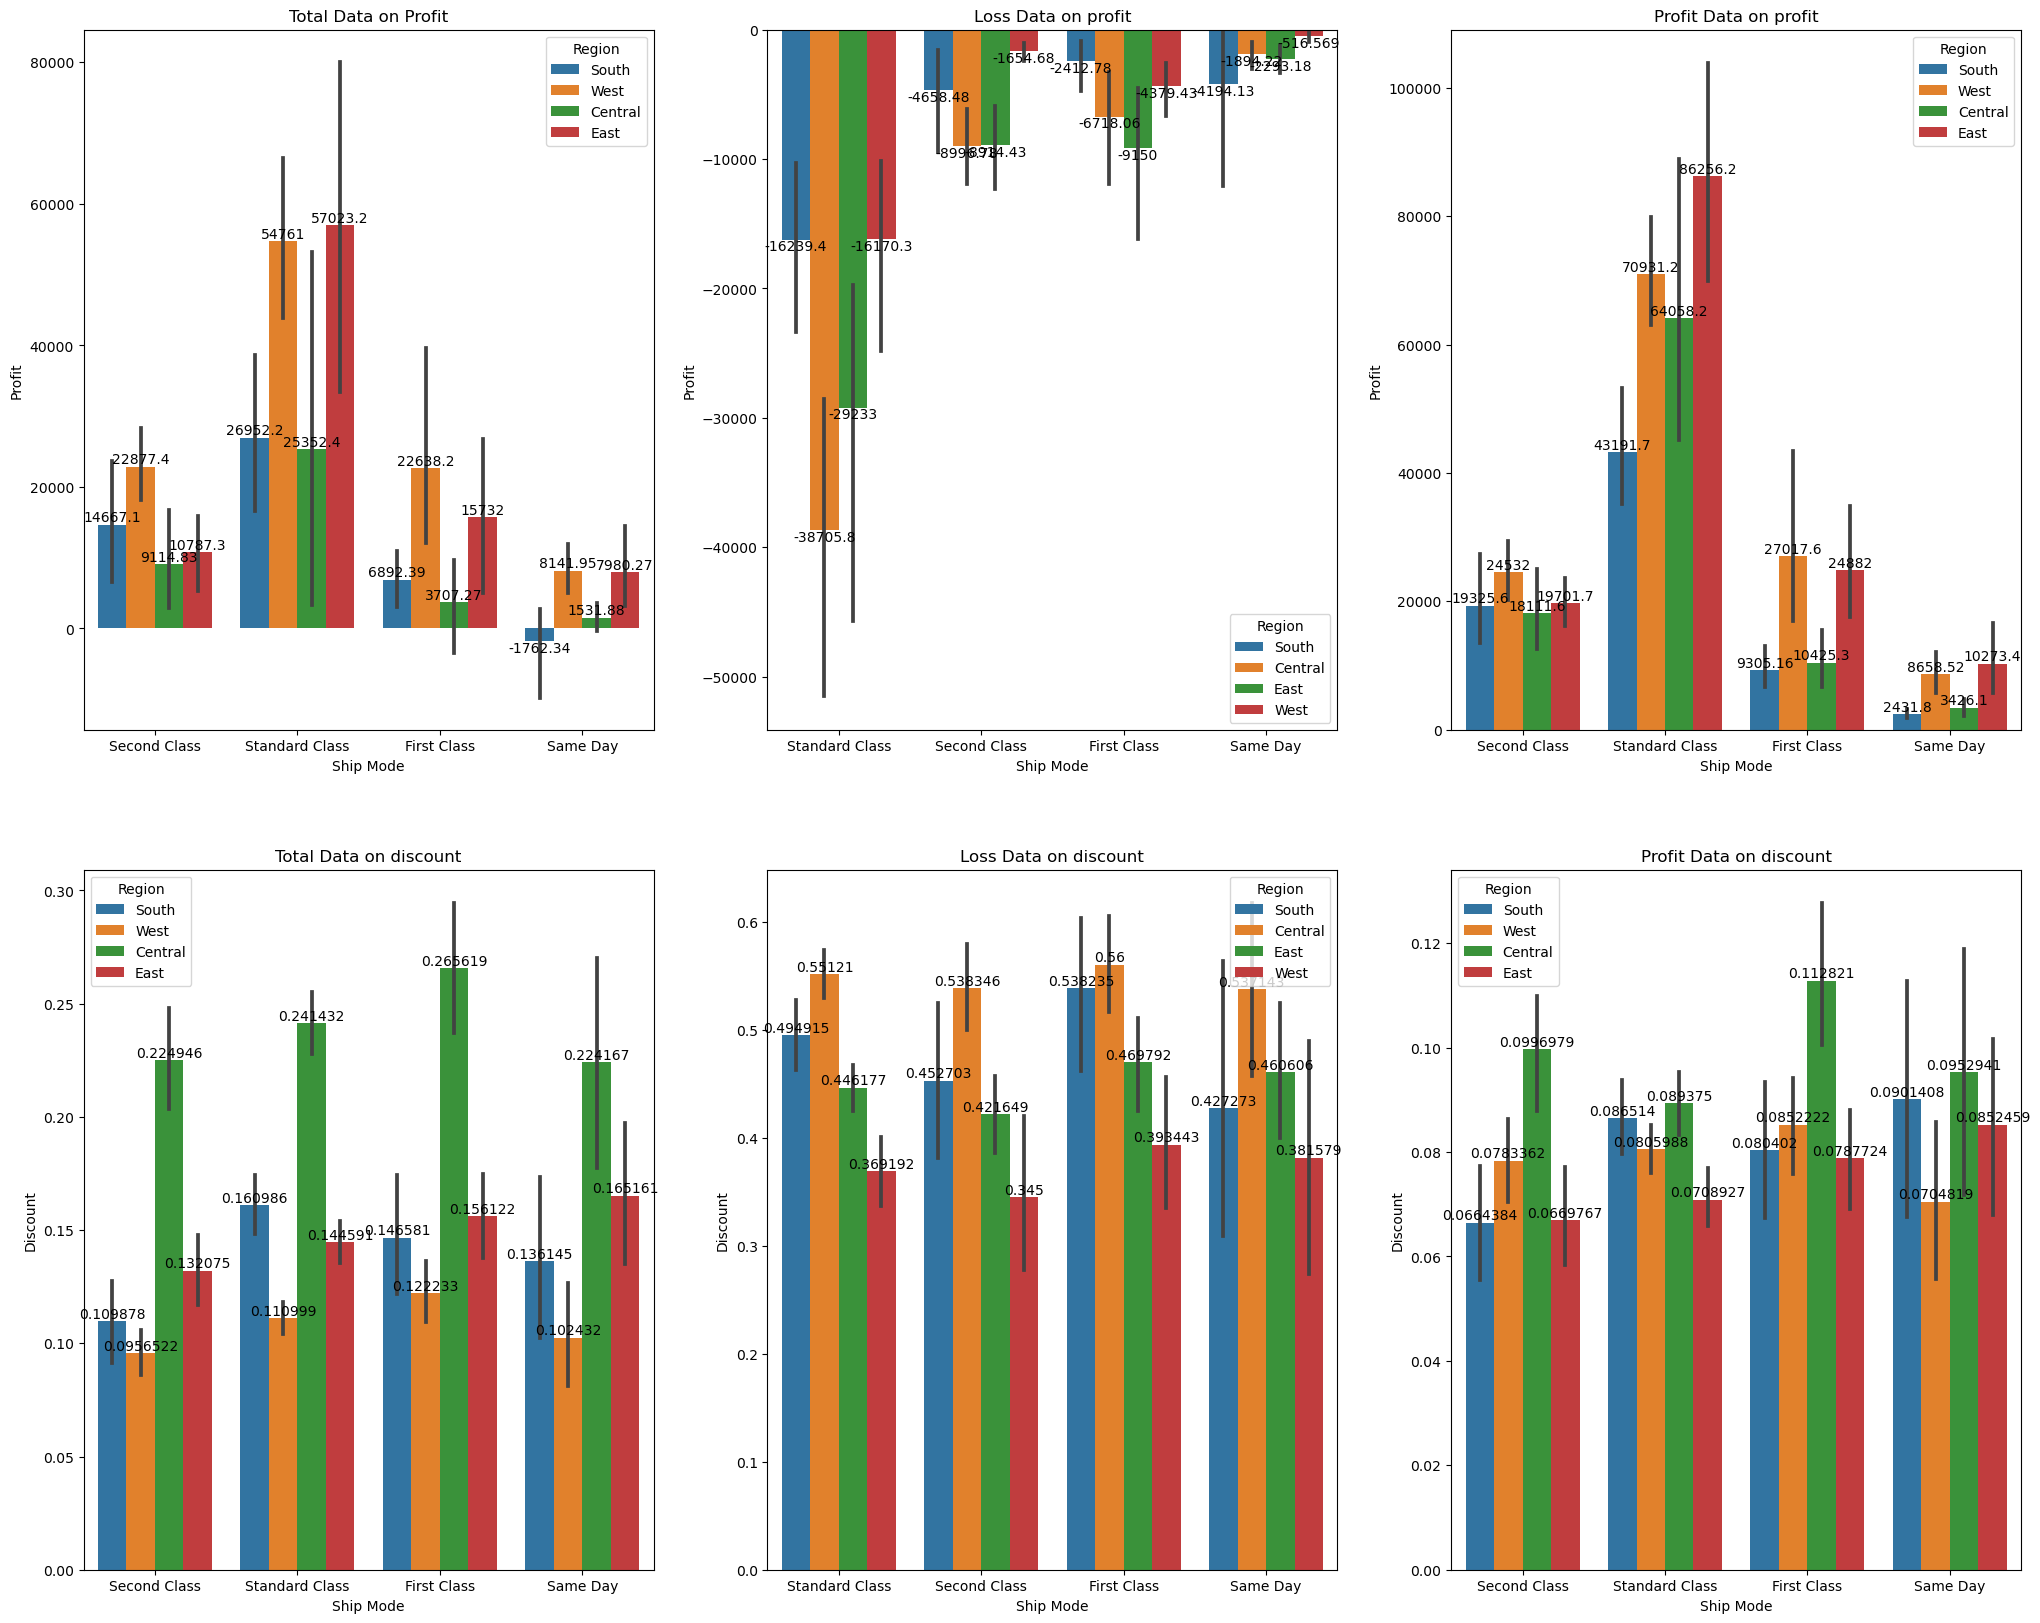

In [31]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
axes[0,0].set_title("Total Data on Profit")
x = sns.barplot(data=d, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)
        
axes[0,1].set_title("Loss Data on profit")
y = sns.barplot(data=loss, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
axes[0,2].set_title("Profit Data on profit")
z = sns.barplot(data=profit, x='Ship Mode', y = 'Profit',hue = "Region", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

axes[1,0].set_title("Total Data on discount")
x = sns.barplot(data=d, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,1])
axes[1,1].set_title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)
axes[1,2].set_title("Profit Data on discount")
z = sns.barplot(data=profit, x='Ship Mode', y = 'Discount',hue = "Region", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

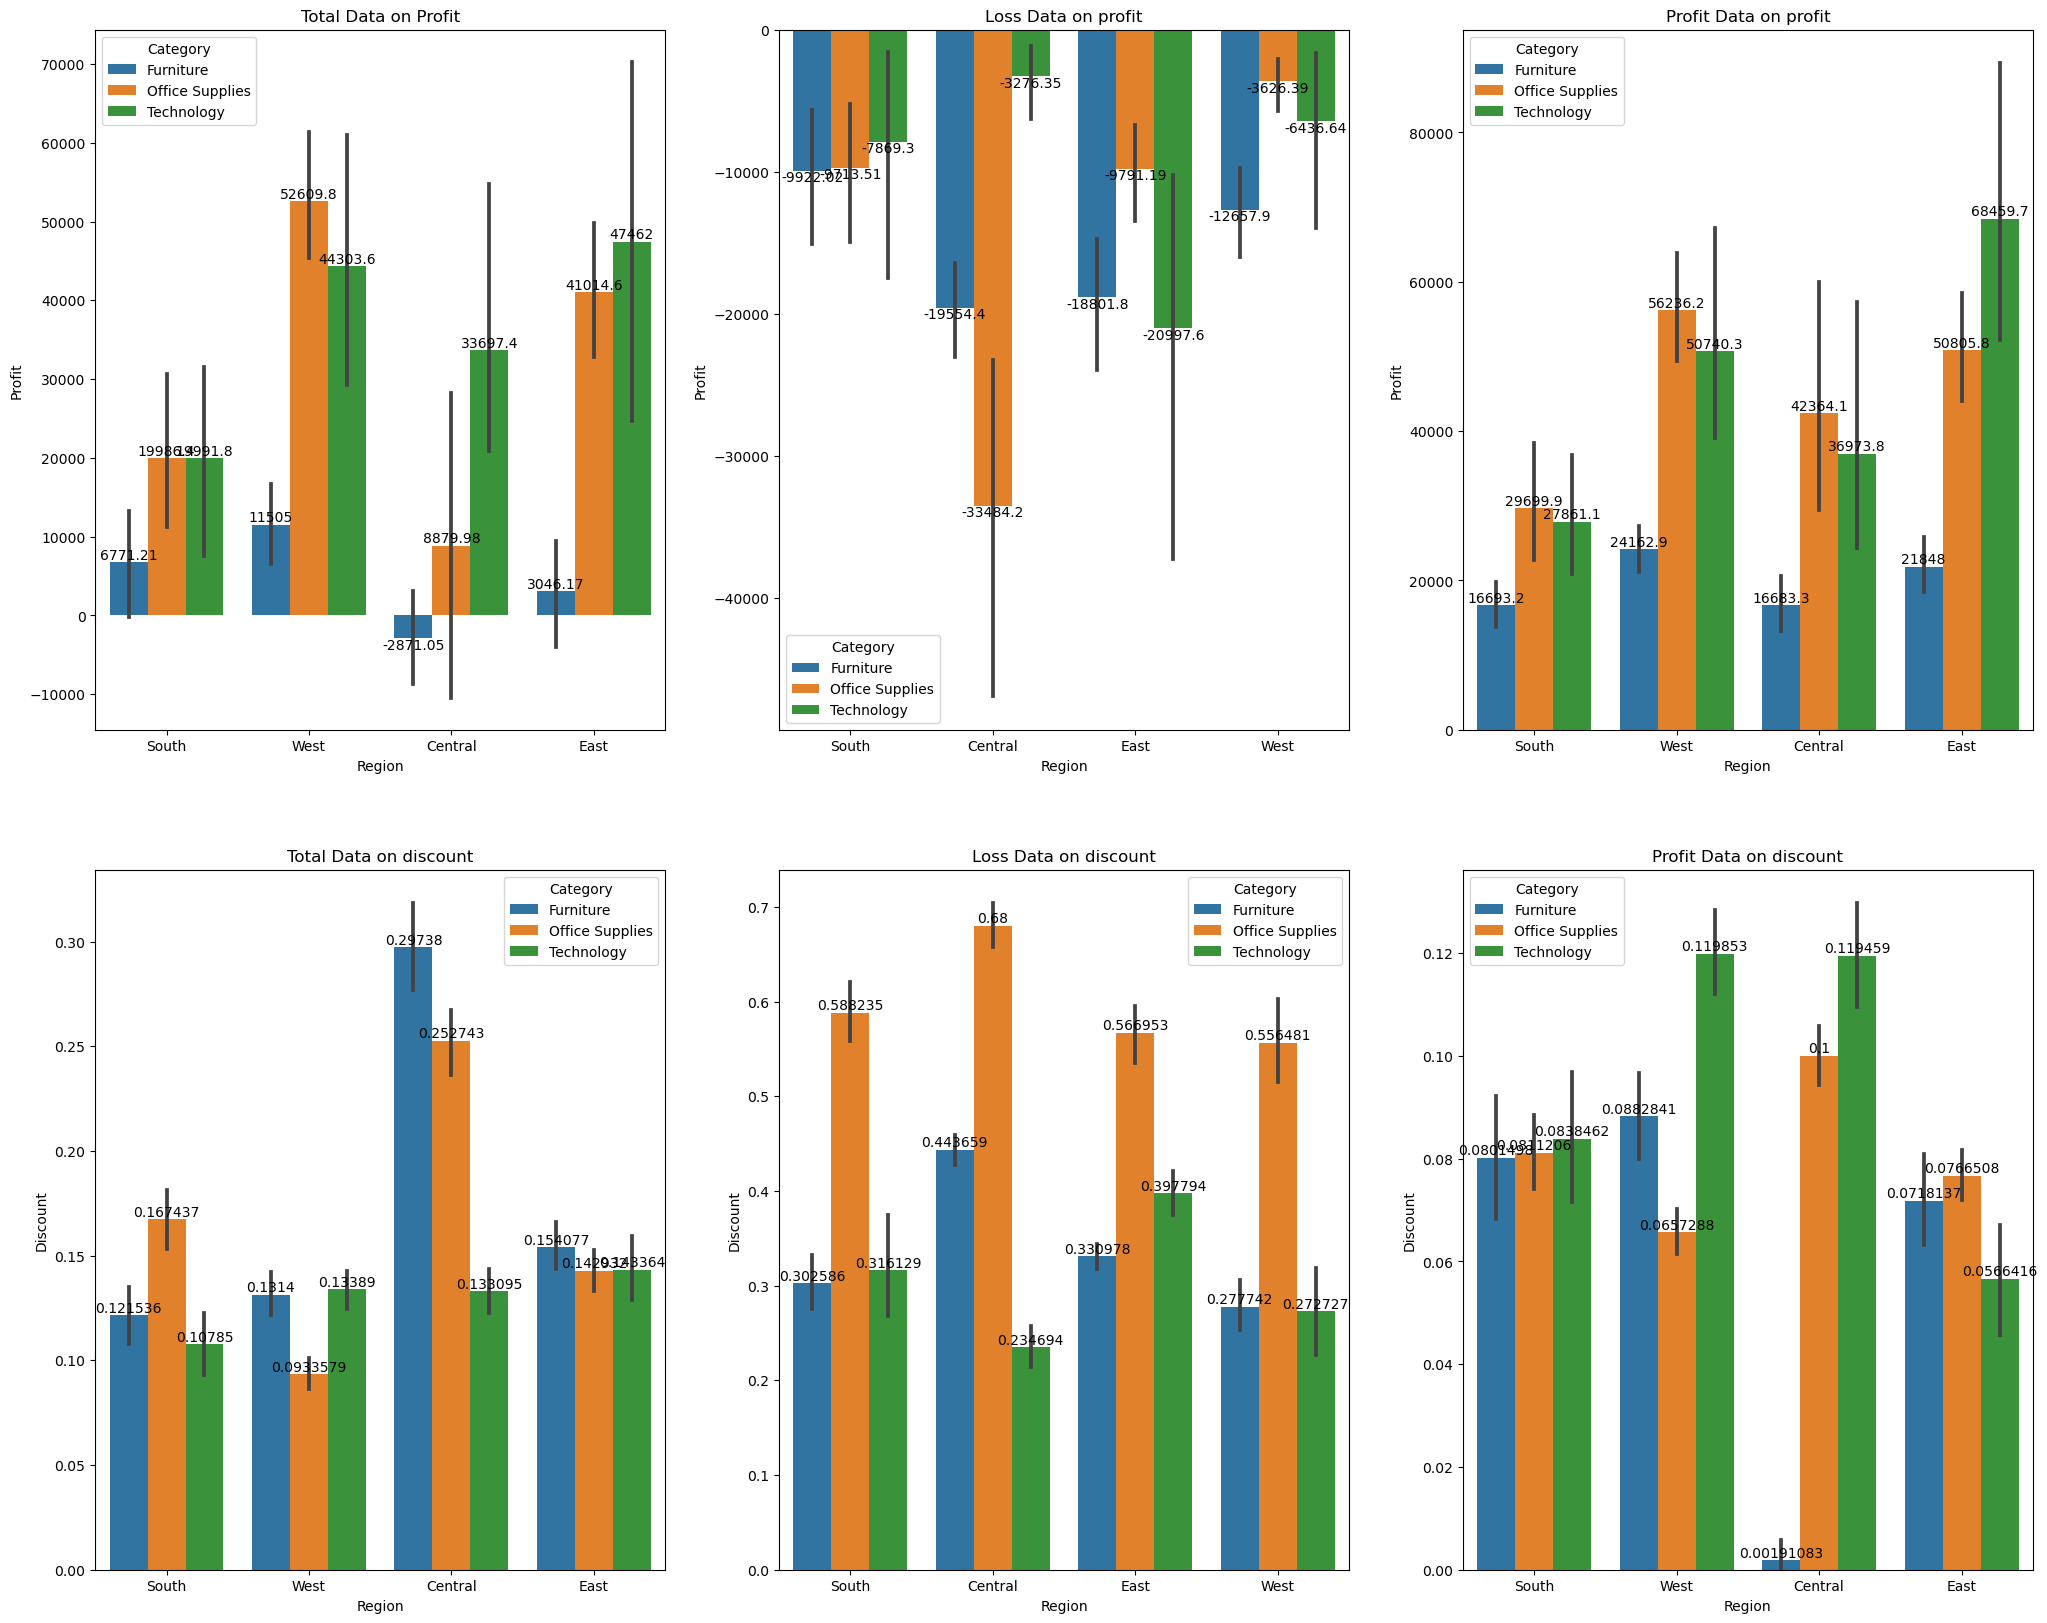

In [32]:
fig, axes = plt.subplots(2,3,figsize=(25, 20))
axes[0,0].set_title("Total Data on Profit")
x = sns.barplot(data=d, x='Region', y = 'Profit',hue = "Category", estimator = np.sum, ax=axes[0,0])
for i in x.containers:
    x.bar_label(i,)

axes[0,1].set_title("Loss Data on profit")
y = sns.barplot(data=loss, x='Region', y = 'Profit',hue = "Category", estimator = np.sum,ax=axes[0,1])
for i in y.containers:
    y.bar_label(i,)
    
axes[0,2].set_title("Profit Data on profit")
z = sns.barplot(data=profit, x='Region', y = 'Profit',hue = "Category", estimator = np.sum,ax=axes[0,2])
for i in z.containers:
    z.bar_label(i,)
    

axes[1,0].set_title("Total Data on discount")
x = sns.barplot(data=d, x='Region', y = 'Discount',hue = "Category", estimator = np.mean,ax=axes[1,0])
for i in x.containers:
    x.bar_label(i,)

y = sns.barplot(data=loss, x='Region', y = 'Discount',hue = "Category", estimator = np.mean,ax=axes[1,1])
axes[1,1].set_title("Loss Data on discount")
for i in y.containers:
    y.bar_label(i,)
    
axes[1,2].set_title("Profit Data on discount")
z = sns.barplot(data=profit, x='Region', y = 'Discount',hue = "Category", estimator = np.mean,ax=axes[1,2])
for i in z.containers:
    z.bar_label(i,)

# Lets calculate how much decrease in discount may increase the profit

In [33]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


# This the just a probabity calculation to make the negative profit values into positive values

In [34]:
profit_margin_for_loss = ((loss["Profit"]/loss["Sales"])*100)**2
profit_margin_for_loss = np.sqrt(profit_margin_for_loss)
loss.insert(13,"Profit Margin", profit_margin_for_loss, True)

In [35]:
# This discount is based on my fiction
loss.loc[loss["Discount"] > 0.70, "new_discount"] = 0.4
loss.loc[(loss["Discount"] > 0.50) & (loss["Discount"] <= 0.70), "new_discount"] = 0.30
loss.loc[(loss["Discount"] > 0.3) & (loss["Discount"] <= 0.5), "new_discount"] = 0.20
loss.loc[(loss["Discount"] > 0.2) & (loss["Discount"] <= 0.3), "new_discount"] = 0.10
loss.loc[loss["Discount"] <= 0.2, "new_discount"] = loss["Discount"] 

In [36]:
loss["discounted price"] = loss["Sales"] * (1 - loss["new_discount"])

In [37]:
loss["New Profit"] = loss["Sales"] -loss["discounted price"]

In [38]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin,new_discount,discounted price,New Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,40.000000,0.20,766.06200,191.51550
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,180.000000,0.40,41.28600,27.52400
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,150.000000,0.40,1.52640,1.01760
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,1.428571,0.10,64.23480,7.13720
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,54.000000,0.20,2466.74400,616.68600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,160.000000,0.40,13.43160,8.95440
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,80.000000,0.30,4.01940,1.72260
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,5.882353,0.15,580.83220,102.49980
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,2.500000,0.20,56.87040,14.21760


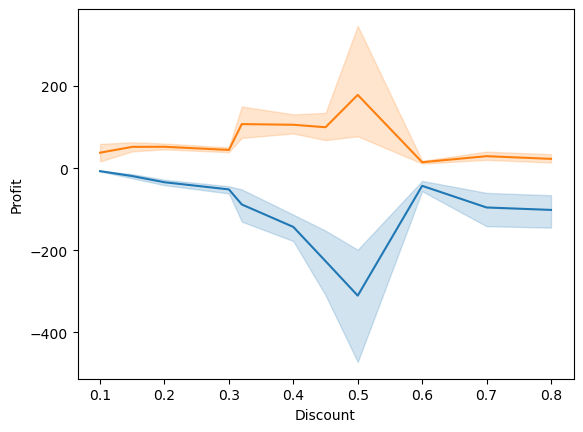

In [39]:
ax= sns.lineplot(x = "Discount",y='Profit', data=loss)
ax1 = sns.lineplot(x = "Discount",y='New Profit', data=loss)

In [40]:
o = loss['New Profit'].mean()
y = loss['New Profit'].sum()
z =  loss['new_discount'].mean()
print("The average new profit in loss dataset is {} and total profit is {}".format(o,y))
print("The average discount is {}".format(z))

The average new profit in loss dataset is 49.26881382148575 and total profit is 92181.95065999999
The average discount is 0.24999999999999872


In [41]:
loss.iplot(kind = "bar", x = "Region", y = ["New Profit", "new_discount",  "Profit", "Discount"])

In [42]:
fig = px.pie(loss, values='New Profit', names='Region',width=800, height=400)
fig.show()

# Pattern and insights

# Steps to take increase the profit

# Thank you